In [1]:
import pandas as pd
import numpy as np
import datetime
import re
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# KPEB1 BIPV 데이터 추출

In [2]:
df1 = pd.read_csv('./211104/211104 kpeb1.csv', parse_dates = True)

In [3]:
df1['datetime']= pd.to_datetime(df1['datetime'])

In [4]:
df1=df1[(df1['datetime']>='2021-09-13 00:00:00')]

In [5]:
df1=df1[(df1['datetime']<'2021-11-04 00:00:00')]

In [6]:
df1=df1.set_index('datetime')

In [7]:
df1=df1.resample('1T').mean()

In [8]:
df1

,HeatPump(W),Total_Consumption(W),Total_Production(W),Pv1_Supply(W),Pv2_Supply(W)
datetime,,,,,
2021-09-13 00:00:00,111.0,5695.0,0.0,0.0,0.0
2021-09-13 00:01:00,111.0,5284.0,0.0,0.0,0.0
2021-09-13 00:02:00,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:03:00,110.0,5551.0,0.0,0.0,0.0
2021-09-13 00:04:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-11-03 23:55:00,195.0,6076.0,0.0,0.0,0.0
2021-11-03 23:56:00,195.0,6179.0,0.0,0.0,0.0
2021-11-03 23:57:00,195.0,6468.0,0.0,0.0,0.0


# KPEB2 BIPV 데이터 추출

In [9]:
df2 = pd.read_csv('./kpeb2_PV(W).csv', parse_dates = True)

In [10]:
df2['Time']= pd.to_datetime(df2['Time'])

In [11]:
df2=df2[(df2['Time']>='2020-11-24 00:00:00')]

In [12]:
df2=df2[(df2['Time']<'2021-11-04 00:00:00')]

In [14]:
df2=df2.set_index('Time')

In [15]:
df2=df2.resample('1T').mean()

In [16]:
df2

,Unnamed: 0,PV1(V),PV1(A),PV1(kW),��������1(V),��������1(A),������1(kW),�ѹ�����1(kWh),PV2(V),PV2(A),...,PV1(W),������1(W),PV2(W),������2(W),BIPV ����(��),BIPV �ĸ�(��),BIPV �ĸ����(��),PV1_gen(W),PV2_gen(W),PV_tot(W)
Time,,,,,,,,,,,,,,,,,,,,,
2020-11-24 00:00:00,473.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-11-24 00:01:00,474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-11-24 00:02:00,475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-11-24 00:03:00,476.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-11-24 00:04:00,477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03 23:55:00,483912.0,0.0,0.0,NaN,0.0,0.0,NaN,2140.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.15,7.37,7.95,0.0,0.0,0.0
2021-11-03 23:56:00,483913.0,0.0,0.0,NaN,0.0,0.0,NaN,2140.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.22,7.42,7.97,0.0,0.0,0.0
2021-11-03 23:57:00,483914.0,0.0,0.0,NaN,0.0,0.0,NaN,2140.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.32,7.47,7.98,0.0,0.0,0.0


# KePSH1 BIPV 데이터 추출

In [17]:
df3 = pd.read_csv('./kepsh1_PV(W).csv', parse_dates = True)

In [18]:
df3['Time']= pd.to_datetime(df3['Time'])

In [19]:
df3=df3[(df3['Time']>='2021-01-26 00:00:00')]

In [20]:
df3=df3[(df3['Time']<'2021-11-04 00:00:00')]

In [21]:
df3=df3.set_index('Time')

In [22]:
df3=df3.resample('1T').mean()

In [23]:
df3

,before_PV(W),after_PV(W),solar_radiation(W/m2),slope_solar_radiation(W/m2),KP1_PV(W)
Time,,,,,
2021-01-26 00:00:00,0.0,0.0,0.0,0.0,0.0
2021-01-26 00:01:00,0.0,0.0,0.0,0.0,0.0
2021-01-26 00:02:00,0.0,0.0,0.0,0.0,0.0
2021-01-26 00:03:00,0.0,0.0,0.0,0.0,0.0
2021-01-26 00:04:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-11-03 23:55:00,0.0,0.0,0.0,-0.2,0.0
2021-11-03 23:56:00,0.0,0.0,0.0,-0.4,0.0
2021-11-03 23:57:00,0.0,0.0,0.0,-0.2,0.0


# KPEC 합치기

In [36]:
df_kpec = pd.DataFrame()
df_kpec = pd.DataFrame(pd.date_range('2020-11-24 00:00:00', '2021-11-03 23:59:00', freq='T'), columns=['Time'])

In [37]:
df_kpec = df_kpec.set_index('Time')

In [39]:
df_kpec['Color BIPV_KPEB2(W)'] = df2['PV_tot(W)']

In [42]:
df_kpec['Color BIPV_KPEB1(W)'] = df1['Total_Production(W)']
df_kpec['Color BIPV_KePSH1(W)'] = df3['KP1_PV(W)']
df_kpec['Inclined solar irradiance(W/m2)'] = df3['slope_solar_radiation(W/m2)']

In [43]:
df_kpec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496800 entries, 2020-11-24 00:00:00 to 2021-11-03 23:59:00
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Color BIPV_KPEB2(W)              483440 non-null  float64
 1   Color BIPV_KPEB1(W)              65382 non-null   float64
 2   Color BIPV_KePSH1(W)             394340 non-null  float64
 3   Inclined solar irradiance(W/m2)  394340 non-null  float64
dtypes: float64(4)
memory usage: 19.0 MB


In [44]:
df_kpec

,Color BIPV_KPEB2(W),Color BIPV_KPEB1(W),Color BIPV_KePSH1(W),Inclined solar irradiance(W/m2)
Time,,,,
2020-11-24 00:00:00,0.0,NaN,NaN,NaN
2020-11-24 00:01:00,0.0,NaN,NaN,NaN
2020-11-24 00:02:00,0.0,NaN,NaN,NaN
2020-11-24 00:03:00,0.0,NaN,NaN,NaN
2020-11-24 00:04:00,0.0,NaN,NaN,NaN
...,...,...,...,...
2021-11-03 23:55:00,0.0,0.0,0.0,-0.2
2021-11-03 23:56:00,0.0,0.0,0.0,-0.4
2021-11-03 23:57:00,0.0,0.0,0.0,-0.2


In [45]:
df_kpec['Color BIPV_acc_KPEB2(Wh)'] = df_kpec['Color BIPV_KPEB2(W)'].cumsum()*60*1/3600
df_kpec['Color BIPV_acc_KPEB1(Wh))'] = df_kpec['Color BIPV_KPEB1(W)'].cumsum()*60*1/3600
df_kpec['Color BIPV_acc_KePSH1(Wh)'] = df_kpec['Color BIPV_KePSH1(W)'].cumsum()*60*1/3600

In [46]:
df_kpec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496800 entries, 2020-11-24 00:00:00 to 2021-11-03 23:59:00
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Color BIPV_KPEB2(W)              483440 non-null  float64
 1   Color BIPV_KPEB1(W)              65382 non-null   float64
 2   Color BIPV_KePSH1(W)             394340 non-null  float64
 3   Inclined solar irradiance(W/m2)  394340 non-null  float64
 4   Color BIPV_acc_KPEB2(Wh)         483440 non-null  float64
 5   Color BIPV_acc_KPEB1(Wh))        65382 non-null   float64
 6   Color BIPV_acc_KePSH1(Wh)        394340 non-null  float64
dtypes: float64(7)
memory usage: 30.3 MB


In [47]:
df_kpec

,Color BIPV_KPEB2(W),Color BIPV_KPEB1(W),Color BIPV_KePSH1(W),Inclined solar irradiance(W/m2),Color BIPV_acc_KPEB2(Wh),Color BIPV_acc_KPEB1(Wh)),Color BIPV_acc_KePSH1(Wh)
Time,,,,,,,
2020-11-24 00:00:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
2020-11-24 00:01:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
2020-11-24 00:02:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
2020-11-24 00:03:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
2020-11-24 00:04:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-03 23:55:00,0.0,0.0,0.0,-0.2,3.810432e+06,5.438110e+06,1.326114e+07
2021-11-03 23:56:00,0.0,0.0,0.0,-0.4,3.810432e+06,5.438110e+06,1.326114e+07
2021-11-03 23:57:00,0.0,0.0,0.0,-0.2,3.810432e+06,5.438110e+06,1.326114e+07


In [48]:
df_kpec.to_csv('./211109_kpec_BIPV.csv')

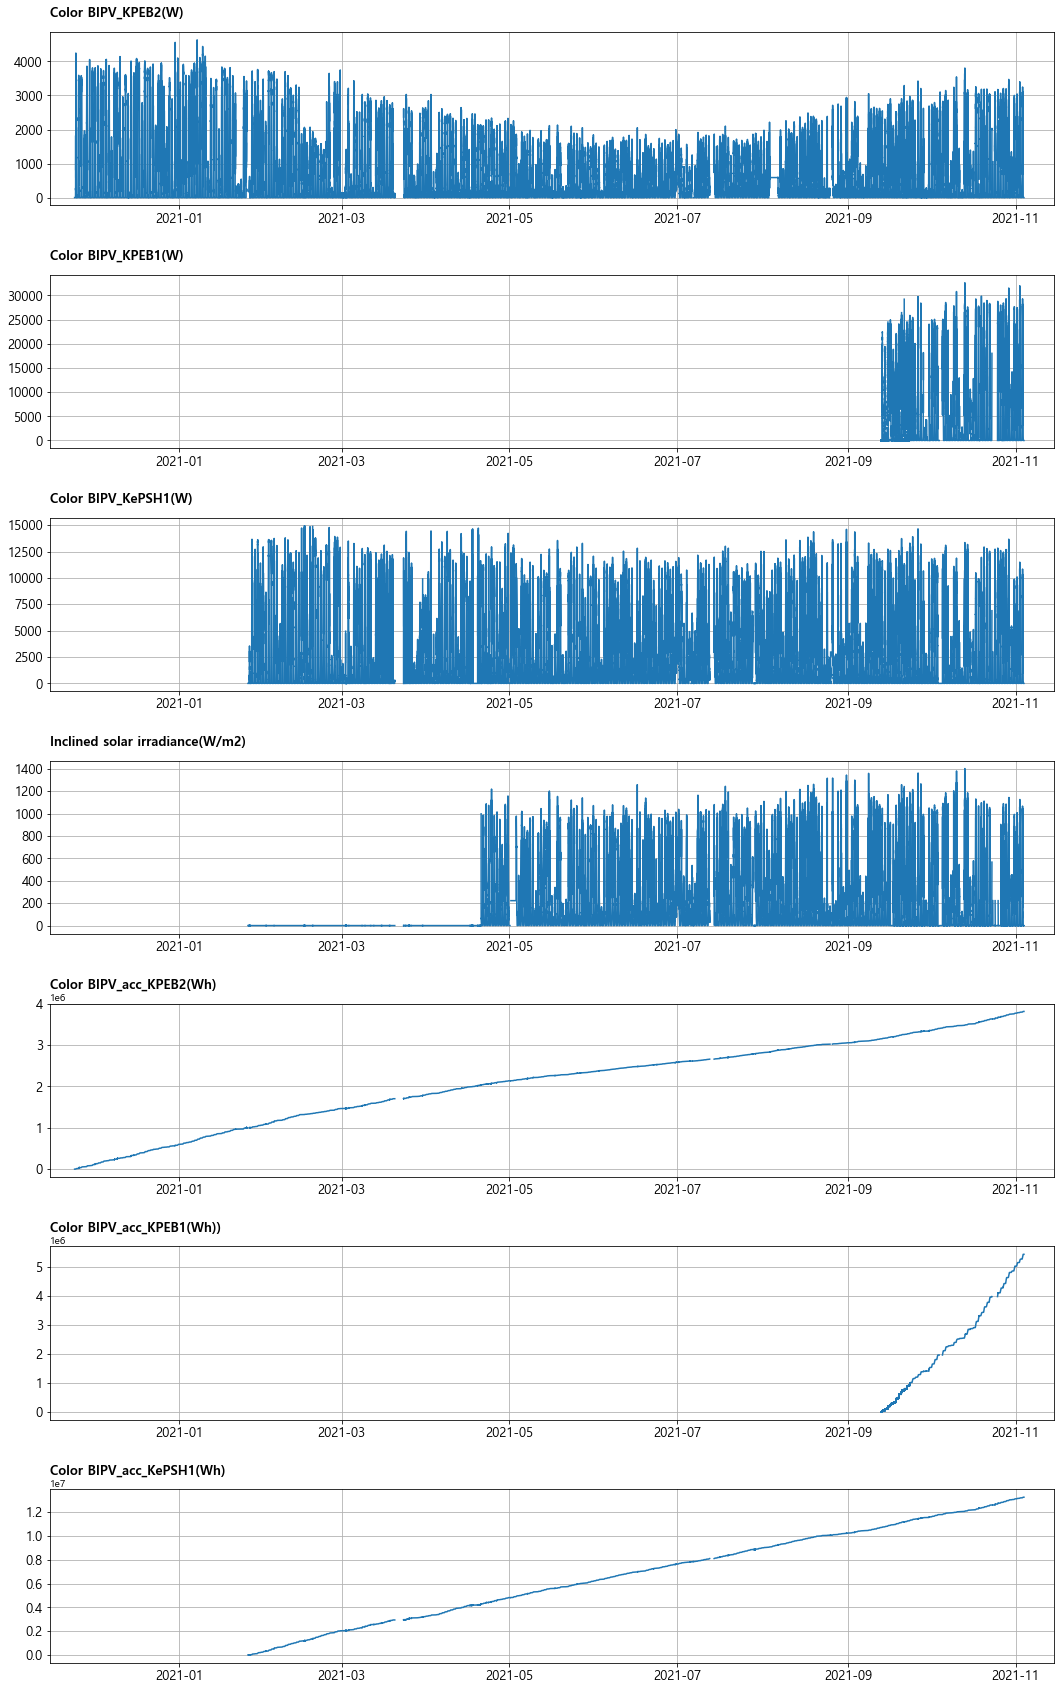

In [52]:
fig, ax = plt.subplots(figsize=(18,30))

for i in range(len(df_kpec.columns)):
    plt.subplot(len(df_kpec.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df_kpec.columns[i]
    plt.plot(df_kpec[name])    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
    plt.xlim(pd.Timestamp('2020-11-15'), pd.Timestamp('2021-11-15'))    
    plt.grid(True)
plt.show()
fig.tight_layout()

In [54]:
df = pd.read_csv('./211109_kpec_BIPV.csv', parse_dates = True)

In [55]:
df

,Time,Color BIPV_KPEB2(W),Color BIPV_KPEB1(W),Color BIPV_KePSH1(W),Inclined solar irradiance(W/m2),Color BIPV_acc_KPEB2(Wh),Color BIPV_acc_KPEB1(Wh)),Color BIPV_acc_KePSH1(Wh)
0,2020-11-24 00:00:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
1,2020-11-24 00:01:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
2,2020-11-24 00:02:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
3,2020-11-24 00:03:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
4,2020-11-24 00:04:00,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...,...
496795,2021-11-03 23:55:00,0.0,0.0,0.0,-0.2,3.810432e+06,5.438110e+06,1.326114e+07
496796,2021-11-03 23:56:00,0.0,0.0,0.0,-0.4,3.810432e+06,5.438110e+06,1.326114e+07
496797,2021-11-03 23:57:00,0.0,0.0,0.0,-0.2,3.810432e+06,5.438110e+06,1.326114e+07
496798,2021-11-03 23:58:00,0.0,0.0,0.0,-0.2,3.810432e+06,5.438110e+06,1.326114e+07


In [56]:
df['Time']= pd.to_datetime(df['Time'])

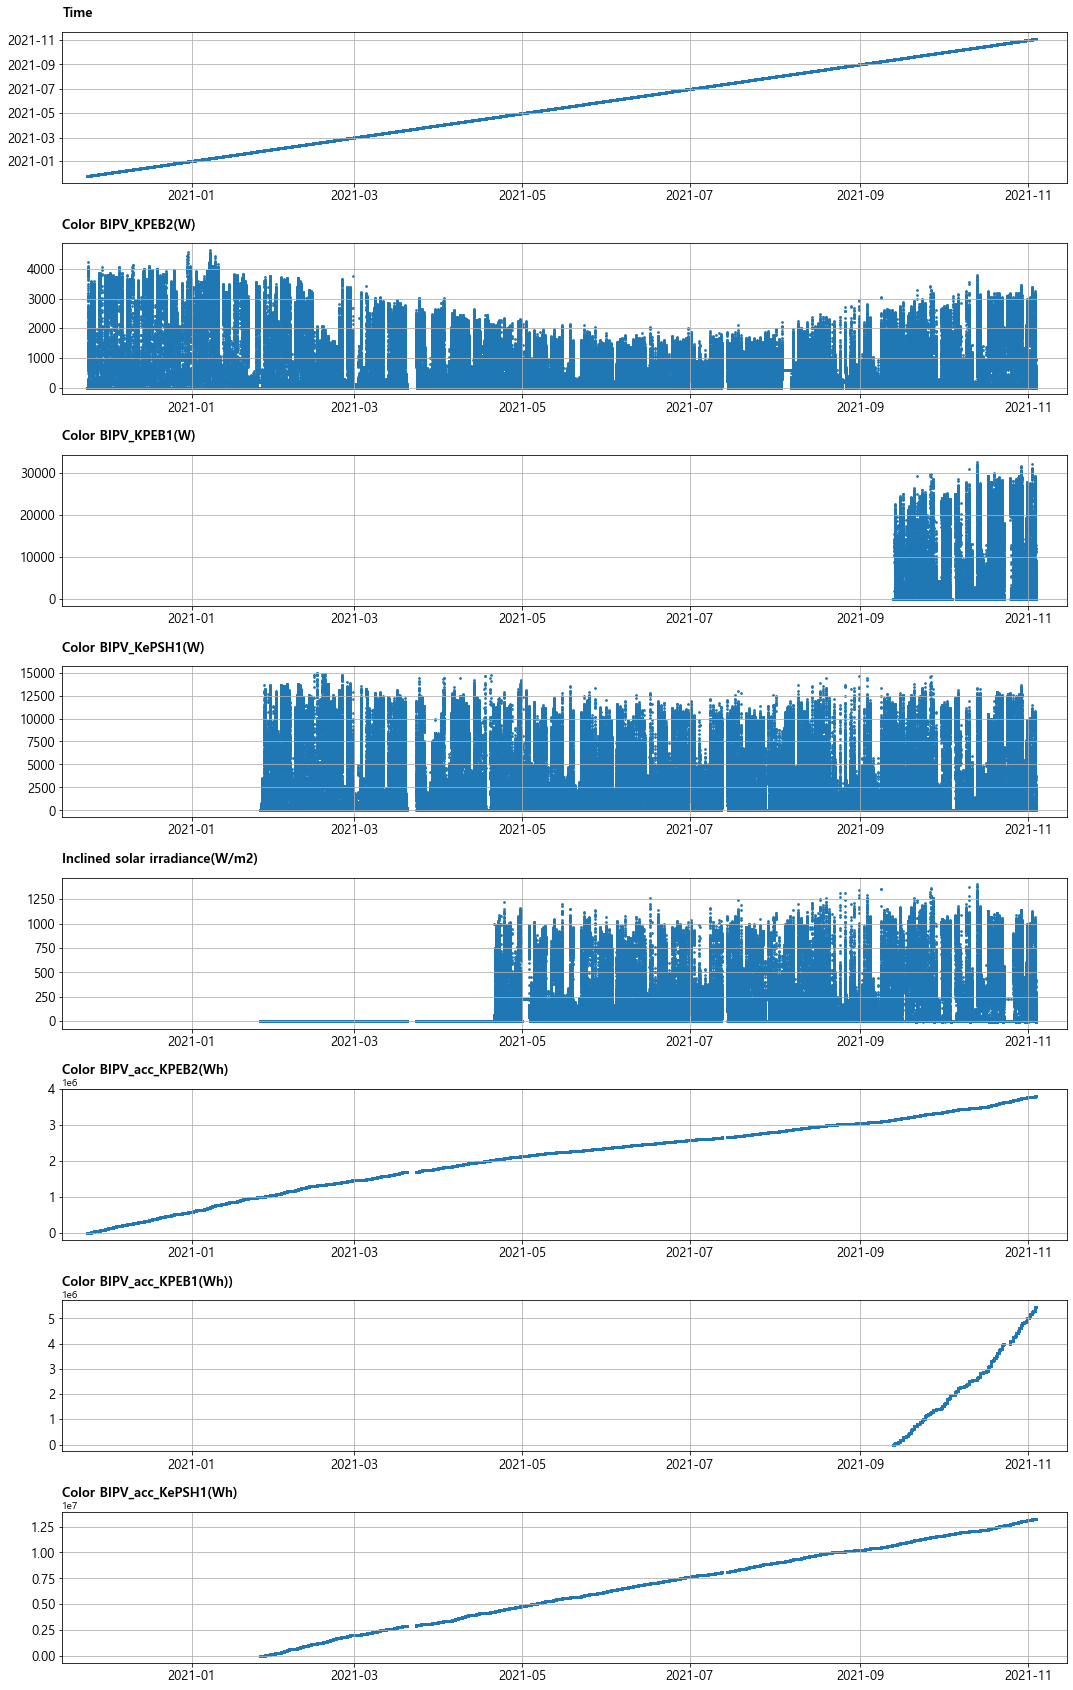

In [58]:
fig, ax = plt.subplots(figsize=(18,30))


for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    plt.xlim(pd.Timestamp('2021-09-10'), pd.Timestamp('2021-11-05'))    
    name = df.columns[i]
    plt.scatter(x=df['Time'], y=df[name], s=3)   
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.xlim(pd.Timestamp('2020-11-15'), pd.Timestamp('2021-11-15'))    
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)    
    plt.grid(True)
plt.show()
fig.tight_layout()